In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt , seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("kaggle_diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
df.shape

(2000, 9)

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
df=df.rename(columns={"DiabetesPedigreeFunction": 'DPF'})

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


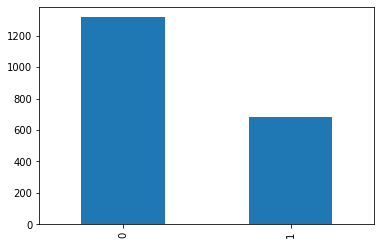

In [12]:
df['Outcome'].value_counts().plot(kind="bar")
plt.show()

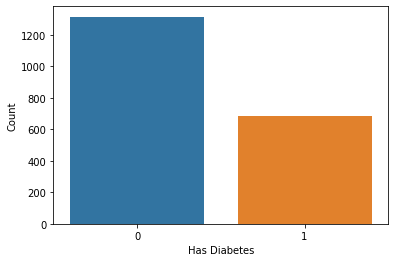

In [13]:
sns.countplot(data=df, x='Outcome')
# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')
plt.show()

# Check outlier

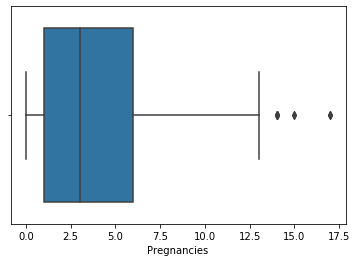

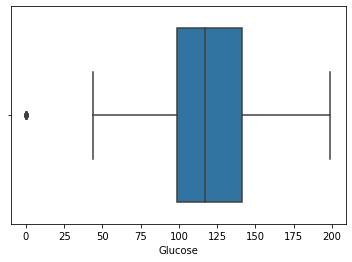

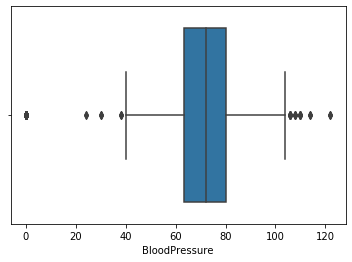

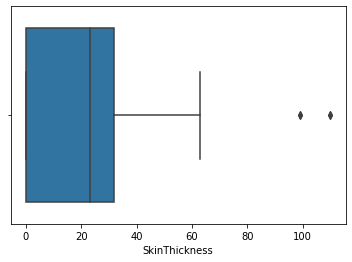

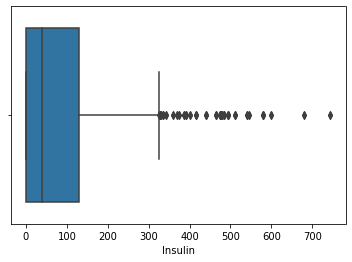

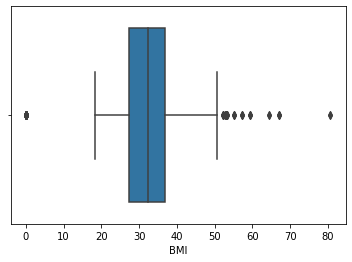

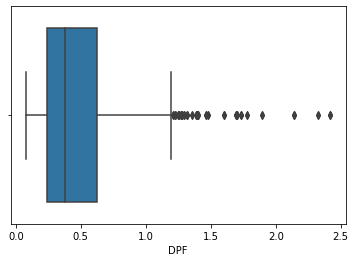

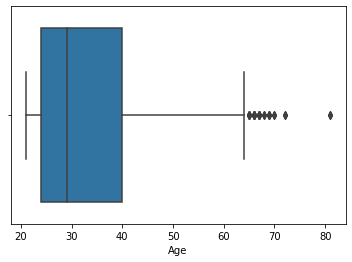

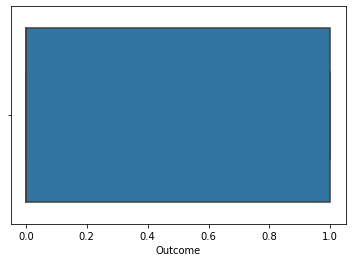

In [14]:
for i in df.columns:
    sns.boxplot(data=df, x=i)
    plt.show()

In [15]:
# 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' should not be 0 so we replce 0 to nan in data cleaning

# Data Cleaning

In [16]:
df_copy= df.copy(deep=True)

df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [17]:
df_copy.isna().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

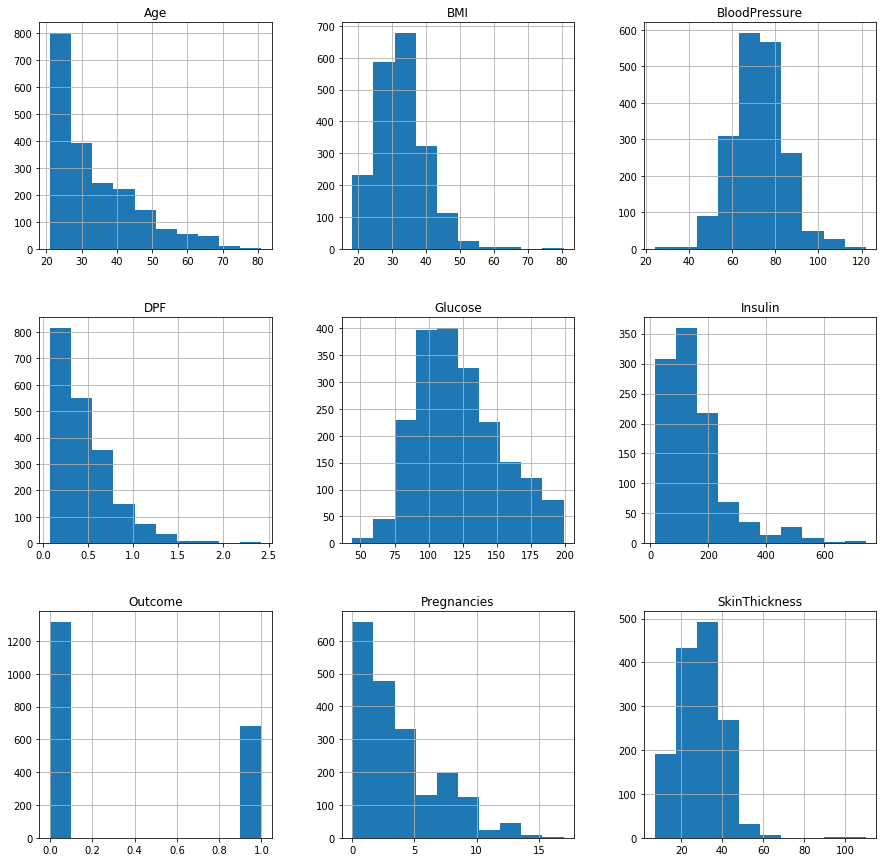

In [18]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))

In [19]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

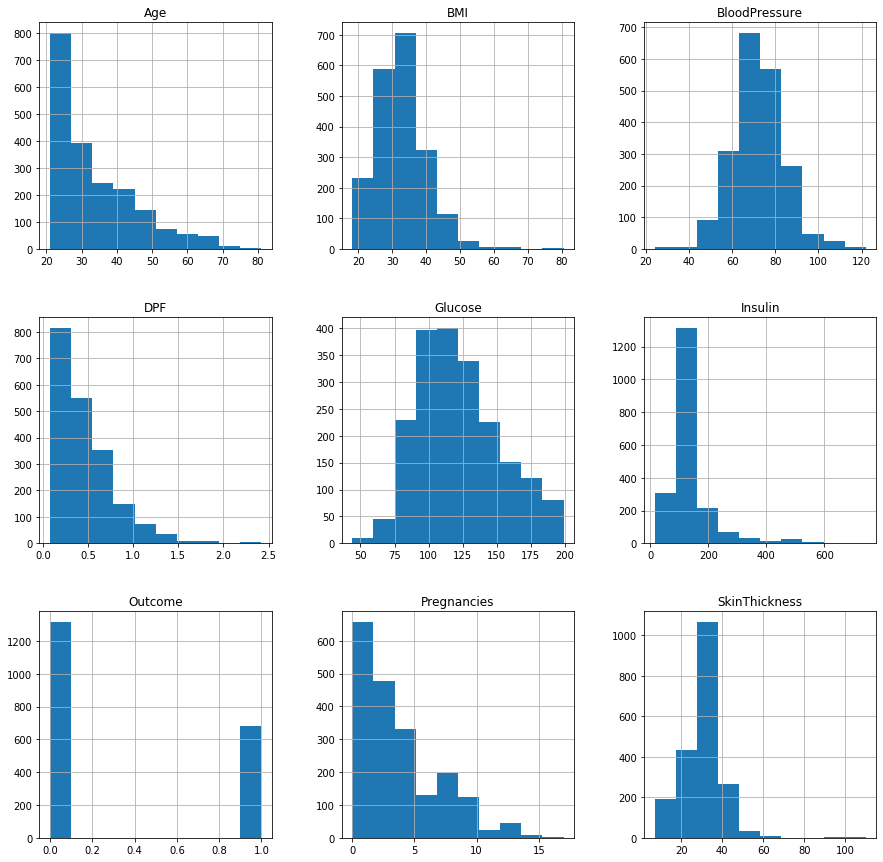

In [20]:
# Plotting histogram of dataset after replacing NaN values
p = df_copy.hist(figsize=(15,15))

In [21]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

# Train Test Split

In [22]:
X=df_copy.drop("Outcome", axis=1)
y=df_copy['Outcome']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2 , random_state=45)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 8)
(400, 8)
(1600,)
(400,)


In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Model Building

# Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
print("Accuracy of Train Model {}% and Test Model{}%".format(lr.score(X_train, y_train), lr.score(X_test, y_test)))

Accuracy of Train Model 0.77625% and Test Model0.775%


# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
print("Accuracy of Train Model {}% and Test Model{}%".format(dtc.score(X_train, y_train), dtc.score(X_test, y_test)))

Accuracy of Train Model 1.0% and Test Model0.9%


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
print("Accuracy of Train Model {}% and Test Model{}%".format(rfc.score(X_train, y_train), rfc.score(X_test, y_test)))

Accuracy of Train Model 1.0% and Test Model0.96%


# Support Vector Classifier

In [32]:
from sklearn.svm import SVC
svc=SVC(C=105)

In [33]:
svc.fit(X_train, y_train)

SVC(C=105, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
print("Accuracy of Train Model {}% and Test Model{}%".format(svc.score(X_train, y_train), svc.score(X_test, y_test)))

Accuracy of Train Model 0.96625% and Test Model0.9275%


In [35]:
svc=SVC(kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy of Train Model {}% and Test Model{}%".format(svc.score(X_train, y_train), svc.score(X_test, y_test)))

Accuracy of Train Model 0.775% and Test Model0.77%


In [36]:
svc=SVC(kernel='rbf', degree=12)
svc.fit(X_train, y_train)
print("Accuracy of Train Model {}% and Test Model{}%".format(svc.score(X_train, y_train), svc.score(X_test, y_test)))

Accuracy of Train Model 0.86375% and Test Model0.8175%


In [37]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [38]:
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.774375
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.896250
2,random_forest,{'n_estimators': 200},0.950000
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.858750


In [39]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=200, random_state=5), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 96.0%


In [40]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Model Evaluation

In [41]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[262,   7],
       [  3, 128]], dtype=int64)

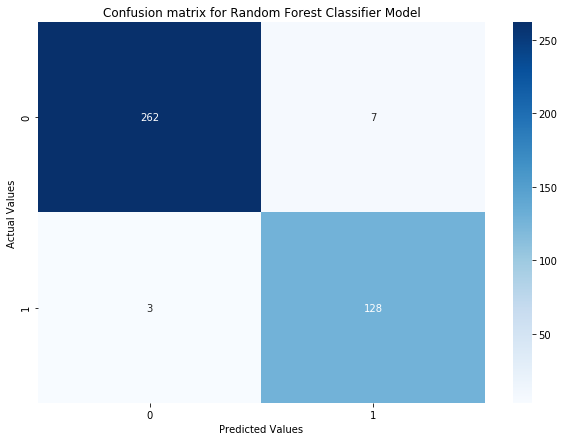

In [42]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [43]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy: {}%".format(score))

Accuracy: 97.5%


In [44]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       269
           1       0.95      0.98      0.96       131

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400



# Prediction

In [54]:
data=[[1, 117, 88, 24, 145, 34.5, 0.403, 40]]
data1=sc.transform(data)
classifier.predict(data1)[0]

1

In [45]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

In [55]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]

0

In [56]:
predict_diabetes(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]

0